# Bài tập Colab số 1
# Recognizing hand-written digits

> Nhận diện chữ số viết tay sử dụng thư viện sklearn

> Yêu cầu phân tích:
>> - Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
>> - Dựa vào đâu để biết kết luận là tốt hay không?
>> - Nếu không tốt thì lý do tại sao?
>> - Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?



# **Import libraries**


In [26]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


# **Digits dataset**

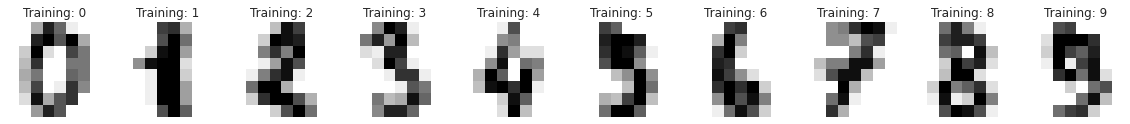

In [68]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


178
182
177
183
181
182
181
179
174
180


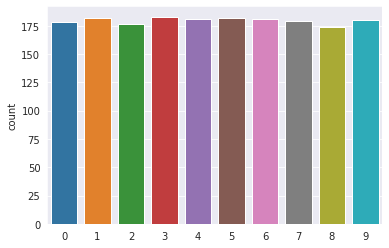

In [28]:
#Kiểm tra phân phối của bộ dữ liệu
import seaborn as sns
l = []
for i in digits.target:
    if(i == 0):
      l.append("0")
    if(i == 1):
      l.append("1")
    if(i == 2):
      l.append("2")
    if(i == 3):
      l.append("3")
    if(i == 4):
      l.append("4")
    if(i == 5):
      l.append("5")
    if(i == 6):
      l.append("6")
    if(i == 7):
      l.append("7")
    if(i == 8):
      l.append("8")
    if(i == 9):
      l.append("9")
sns.set_style('darkgrid')
sns.countplot(l)
for i in range(10):
  print(l.count(str(i)))

# **Classification**

In [70]:
#Kiểm tra giá trị mỗi pixel của dữ liệu được đem đi huấn luyện
a = digits.images[0]
import numpy as np
x = np.array(a).reshape(1,-1)
np.unique(digits.images)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


90
91
91
92
89
91
90
90
86
88


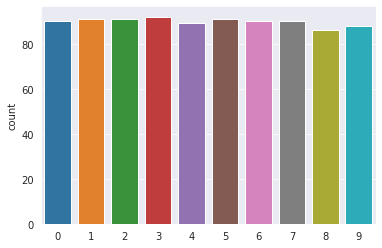

In [36]:
#Kiểm tra phân phối nhãn của bộ dữ liệu được đem đi huấn luyện
import seaborn as sns
l = []
for i in y_train:
    if(i == 0):
      l.append("0")
    if(i == 1):
      l.append("1")
    if(i == 2):
      l.append("2")
    if(i == 3):
      l.append("3")
    if(i == 4):
      l.append("4")
    if(i == 5):
      l.append("5")
    if(i == 6):
      l.append("6")
    if(i == 7):
      l.append("7")
    if(i == 8):
      l.append("8")
    if(i == 9):
      l.append("9")
sns.set_style('darkgrid')
sns.countplot(l)
for i in range(10):
  print(l.count(str(i)))

In [72]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False, random_state=None)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

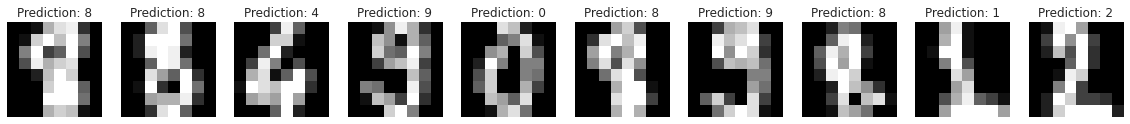

In [73]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

# *Nhận xét*
Dữ liệu huấn luyện là ảnh xám 4bit, kích thước 8x8x1, nền đen chữ trắng, và có lượng phân phối nhãn cân bằng 

# **Take Image from webcam**

In [38]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **Predict**

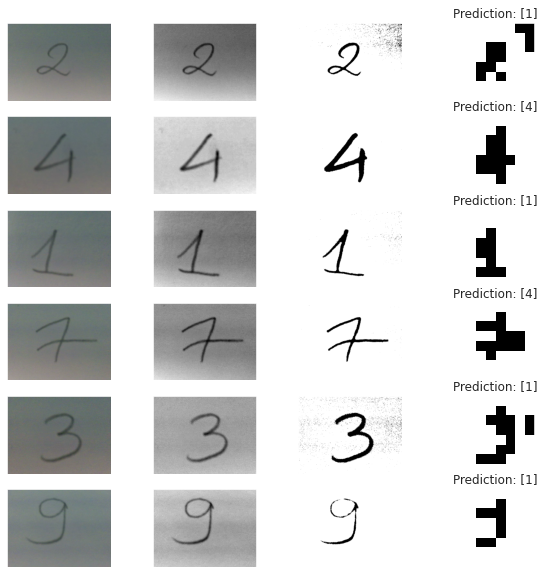

In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

#Tiến hành chạy thực nghiệm thư mục image chứa các hình ảnh chụp từ webcam 
files = os.listdir('/content/image')
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
axs = axs.flat
a = [0,4,8,12,16,20]
for index, i in zip(a,range(len(files))):
    img = cv2.imread('/content/image/' + files[i])
    axs[index].imshow(img)

    #Tiến hành chuẩn hóa dữ liệu
    #Chuẩn hóa từ ảnh màu chụp từ webcam thành ảnh xám
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    axs[index+1].imshow(gray,cmap ='gray')
    #print(gray)

    #Chuyển thành ảnh trắng chữ đen để tăng độ tương phản của ảnh
    ret, blackAndWhiteImage = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    axs[index+2].imshow(blackAndWhiteImage, cmap = 'gray')

    #Điều chỉnh kích thước ảnh về cỡ 8x8
    test_predict = cv2.resize(blackAndWhiteImage,(8,8), interpolation = cv2.INTER_AREA)

    #Chuyển thành ảnh đen chữ trắng để phù với dữ liệu được huấn huyện
    ret, a = cv2.threshold(test_predict, 235 , 255, cv2.THRESH_BINARY_INV)
    axs[index+3].imshow(a,cmap = 'gray_r')

    #Chuẩn hóa dữ liệu ảnh đen trắng về đoạn giá trị [0,16]
    u = a.flatten()
    th = list(u)
    for i in range(len(u)):
      if th[i] == 255:
        th[i] = random.randrange(8,16,1)
    #print(th)
    th = np.array(th)
    
    #Tiến hành dự đoán
    prd = th.reshape((1,64))
    predicted = clf.predict(prd)
    axs[index+3].set_title(f'Prediction: {predicted}')

# **Phân tích**
> - Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
>> Không tốt.
> - Dựa vào đâu để biết kết luận là tốt hay không?
>> Dựa vào kết quả dự đoán của model và nhãn.
> - Nếu không tốt thì lý do tại sao?
>> - Webcam của laptop chụp hình quá tệ, ảnh chụp bị mờ, thiếu độ sáng.
>> - Đối với dữ liệu huấn luyện, ảnh là nền đen chữ trắng nên nếu dữ liệu thu thập từ bên ngoài không được chuyển về cùng kiểu với ảnh huấn luyện, sẽ dẫn đến việc dữ liệu không thể 'khớp' với model và model dự đoán ra kết quả sai.
>> - Bên cạnh đó, dữ liệu huấn luyện là ảnh 4bit (mỗi pixel trên ảnh thuộc đoạn giá trị từ 0 đến 16 biểu diễn từ bit tối nhất đến bit sáng nhất), có kích thước nhỏ. Còn đối với dữ liệu thu thập bên ngoài là ảnh 8bit hoặc 10bit, (mỗi pixel trên ảnh thuộc đoạn giá trị từ 0 đến 255), kích thước lớn.
>> - Như vậy những pixel trên ảnh 8bit có giá trị lớn hơn 16 khi đưa vào thuật toán với dữ liệu huấn luyện là 4bit, thì tất cả những pixel đó sẽ được hiểu là các bit sáng. Tuy nhiên những pixel này, về bản chất sẽ có những trường hợp là bit sáng hoặc bit tối, hơn nữa những bit có giá trị bé hơn 16 thì với ảnh 8bit sẽ là các bit tối. Dẫn đến việc sử dụng thuật toán được huấn luyện với ảnh 4bit có kích thước nhỏ mà kiểm thử sử dụng ảnh 8bit có kích thước ngẫu nhiên, kèm theo việc ảnh chụp từ webcam nên sẽ có kích thước lớn hơn rất nhiều, và là ảnh màu (WxHx3), nhưng ảnh được huấn luyện có kích thước là 8x8x1 và thuật toán huấn luyện bộ dữ liệu này là SVM nên kích thước dữ liệu đầu vào của thuật toán phải cùng kích thước của bộ dữ liệu đem đi huấn luyện và các kích thước này phải bằng nhau. Vì vậy việc điều chỉnh kích thước ảnh để đem vào dự đoán sẽ làm mất mát rất là nhiều thông tin, dẫn tới việc dự đoán không được chính xác.
>> - Nếu có khả năng chuẩn hóa dữ liệu và đưa ảnh về 4bit mà không gây mất mất quá nhiều thông tin thì việc dự đoán có khả năng độ chính xác sẽ tăng lên.
> - Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
>> Không thể, lý do như trên.
